<a href="https://colab.research.google.com/github/Vinaya-Sharma/TransmissionLineFaultDetection/blob/main/TransmissionLineFaultDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install & Import Dependencies

In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO
!pip3 install torch torchvision torchaudio

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os

In [ ]:
HOME = os.getcwd()
HOME

 2. Load & Run Model 

In [ ]:
import cv2
model = YOLO('yolov8n.pt')
res = model('https://ultralytics.com/images/bus.jpg')
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

 3. Training on custom dataset

In [ ]:
!mkdir datasets 
%cd datasets 

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="your api key here")
project = rf.workspace("scidrones").project("emerge-test-1")
dataset = project.version(1).download("yolov8")

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

4. Visualizing the results

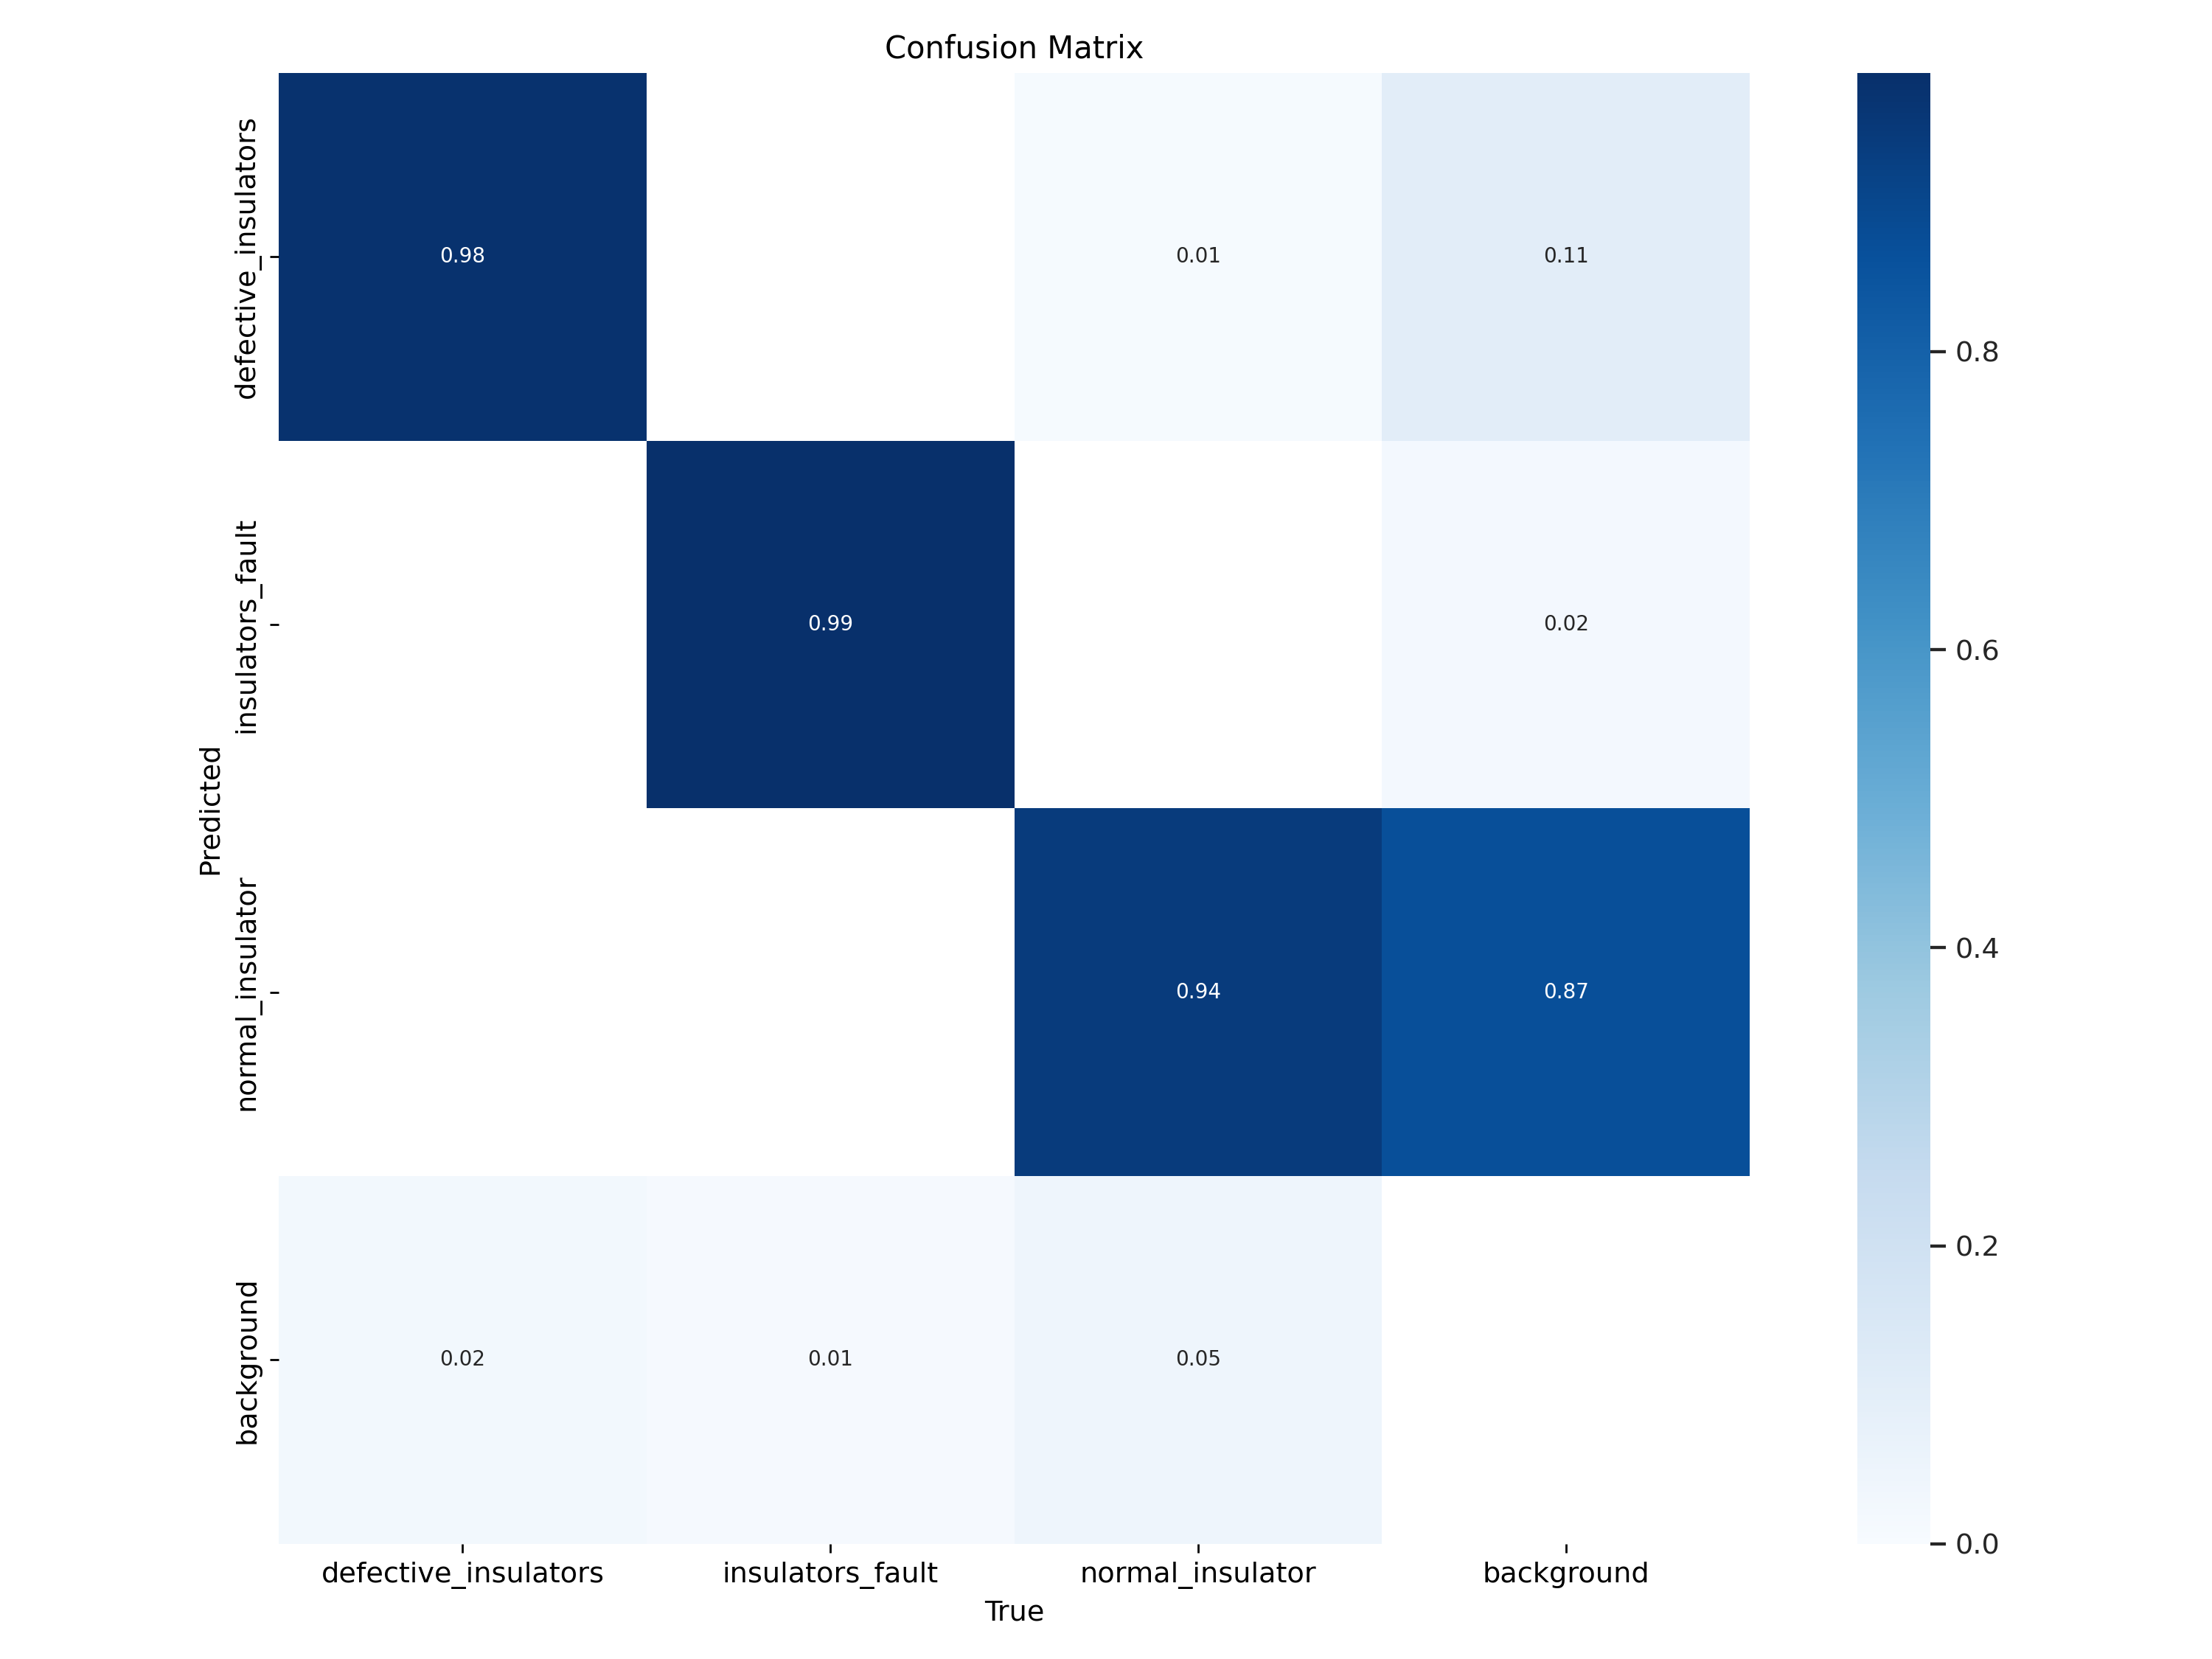

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

/content


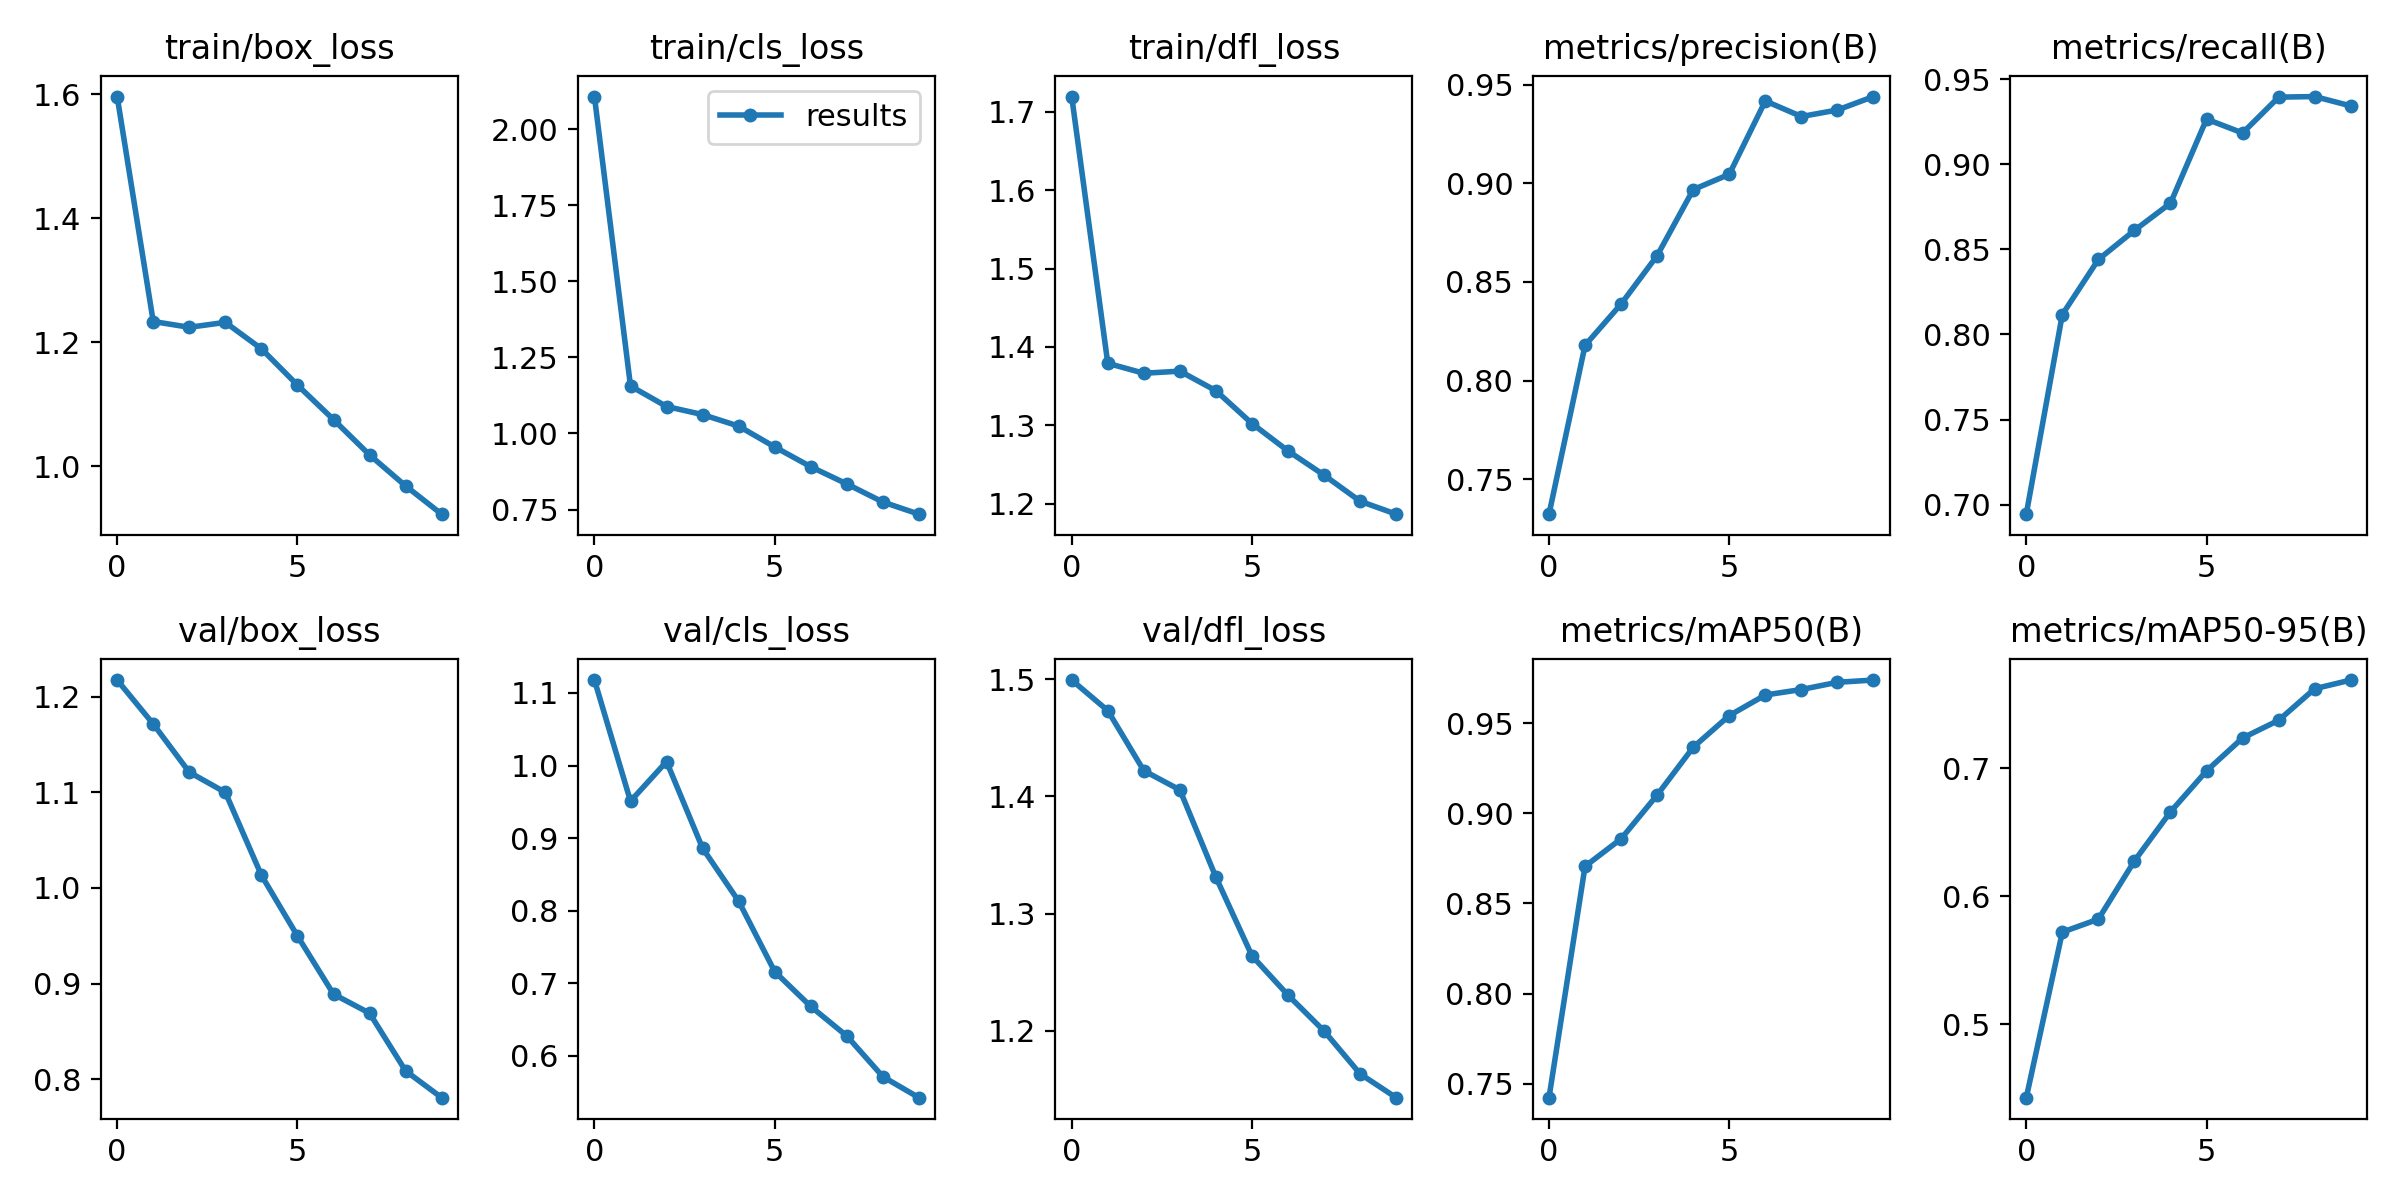

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

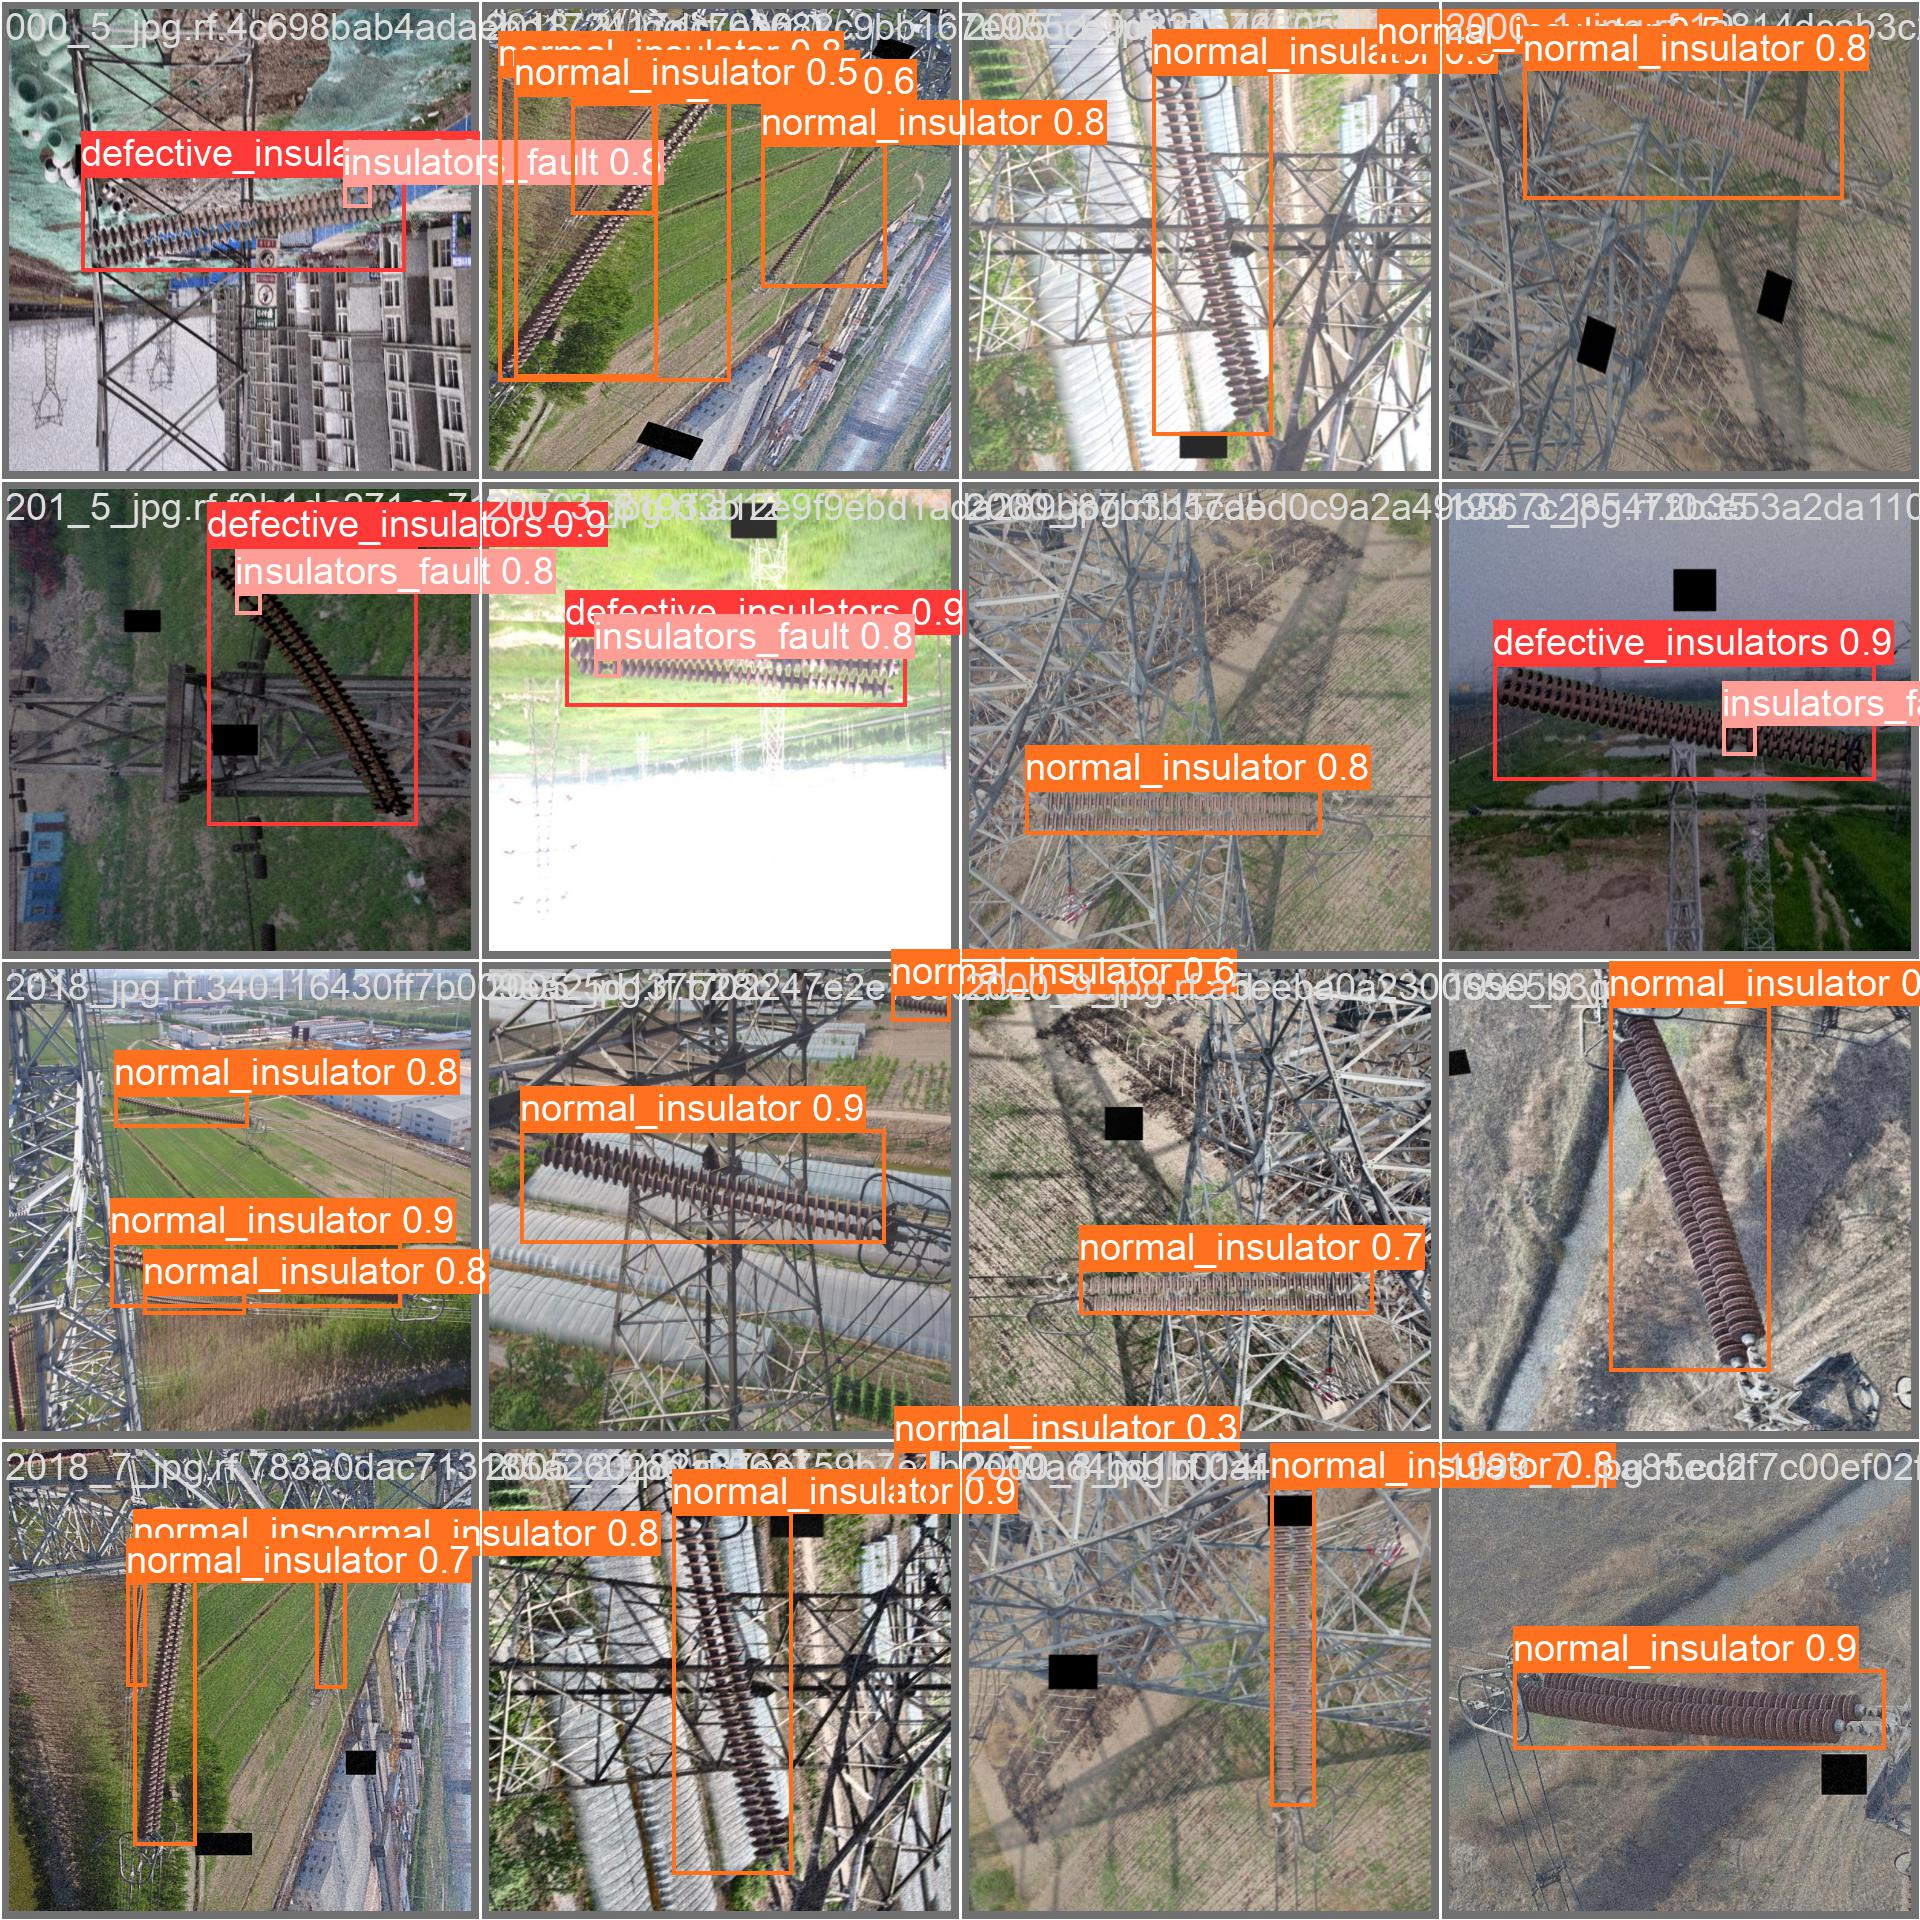

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

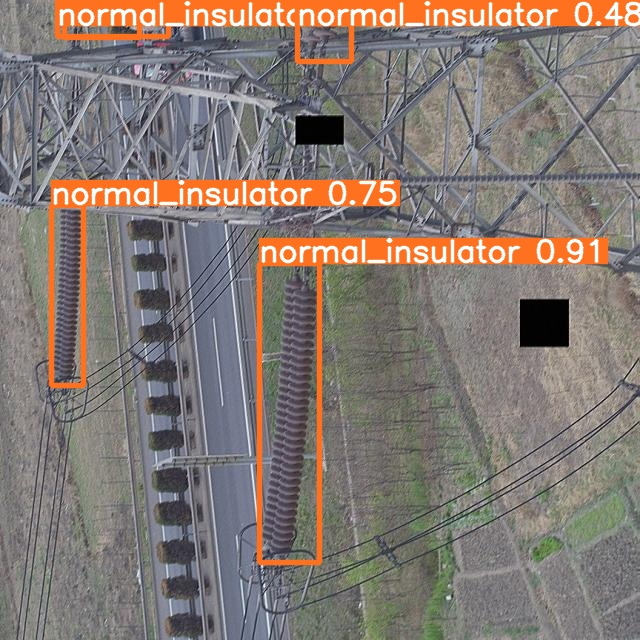

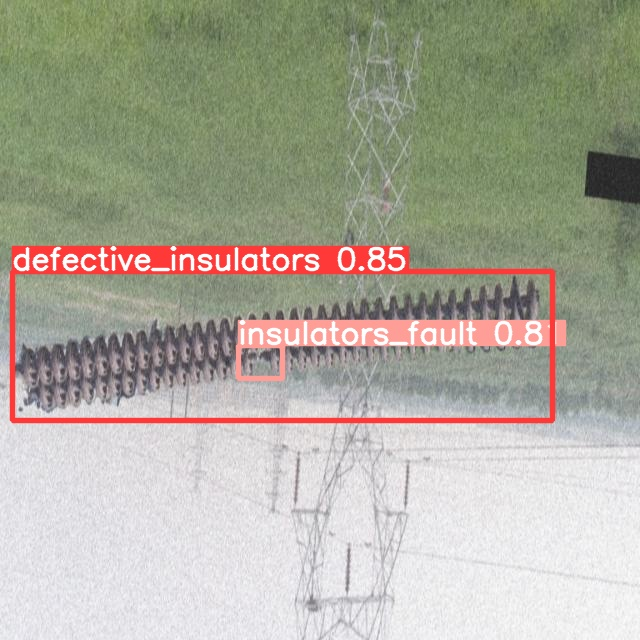

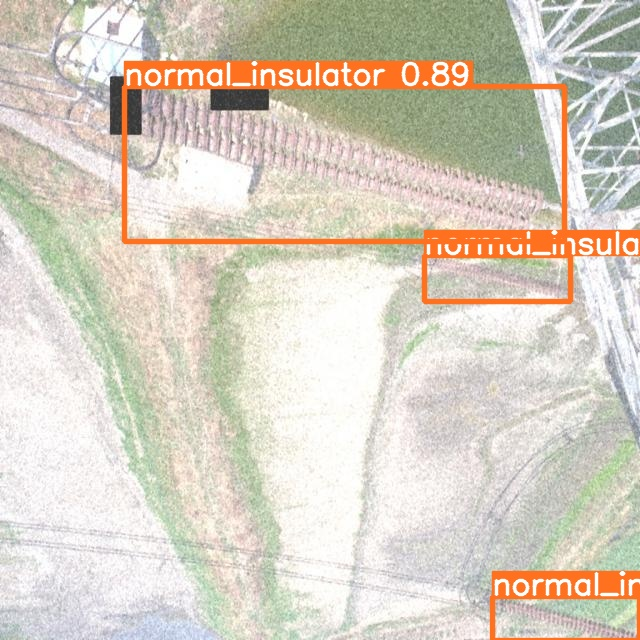

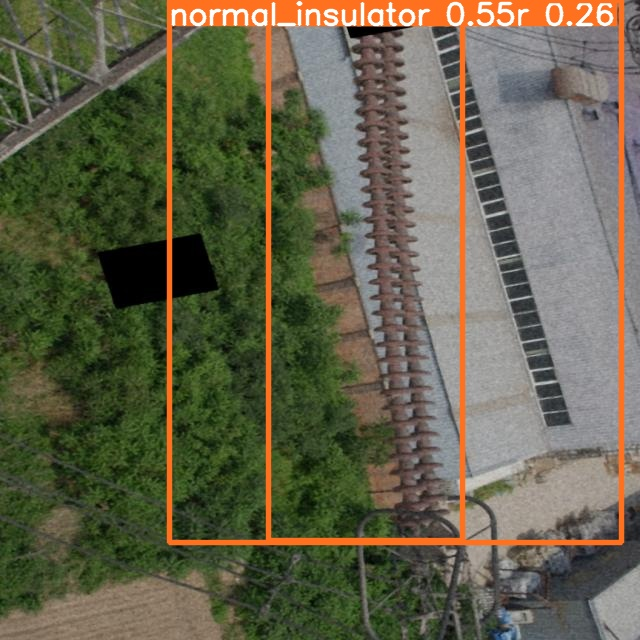

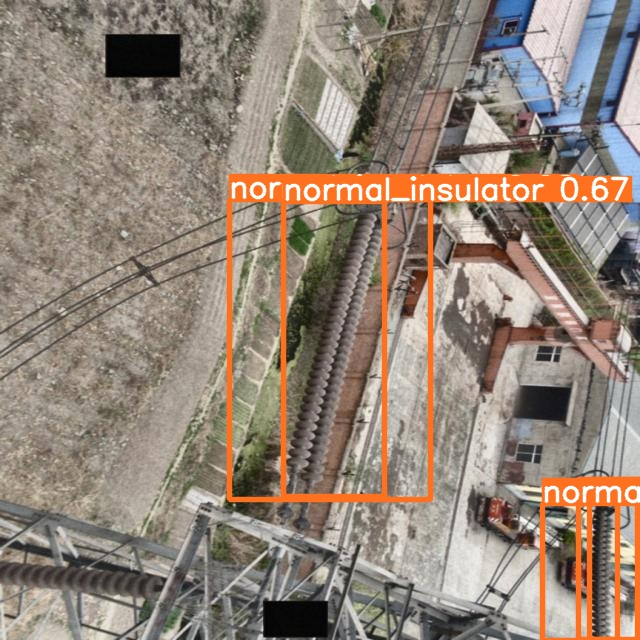

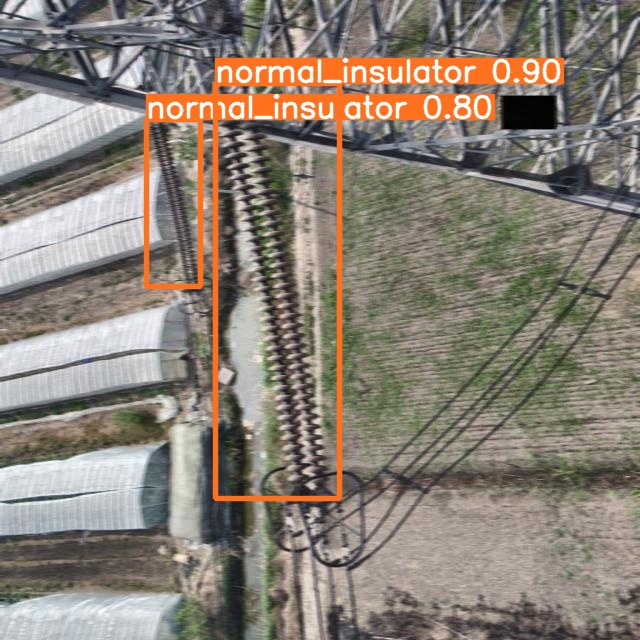

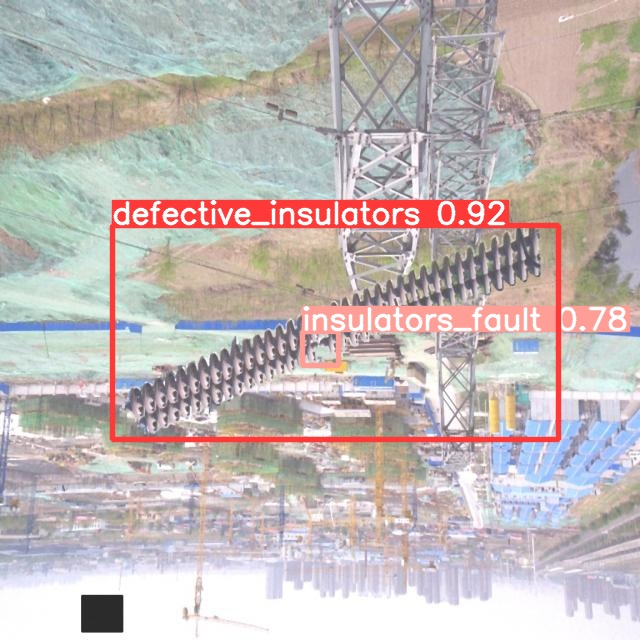

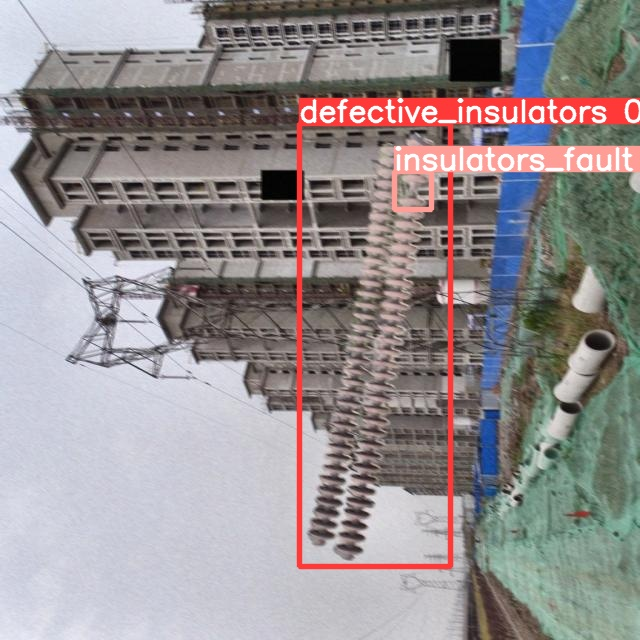

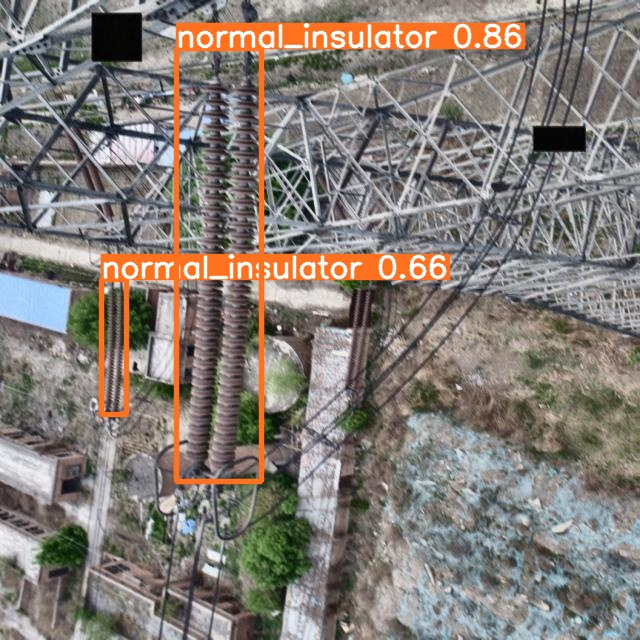

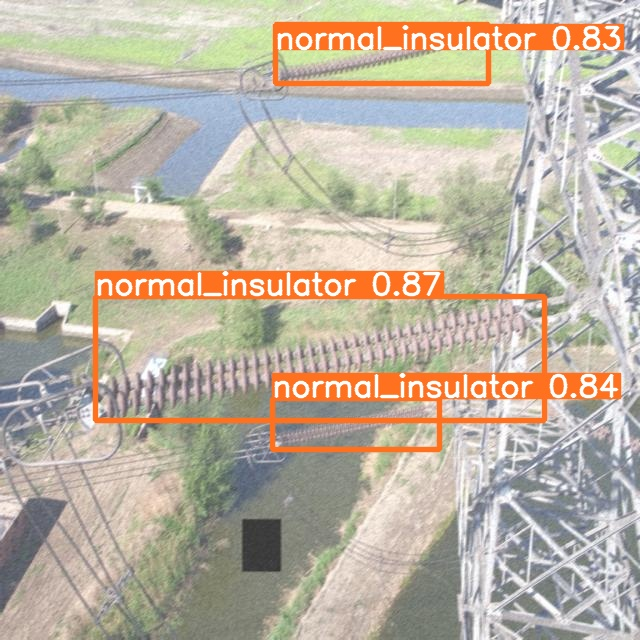

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")